# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

##### MNIST dataset Loading

In [3]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [4]:
print(train_image.shape, test_image.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


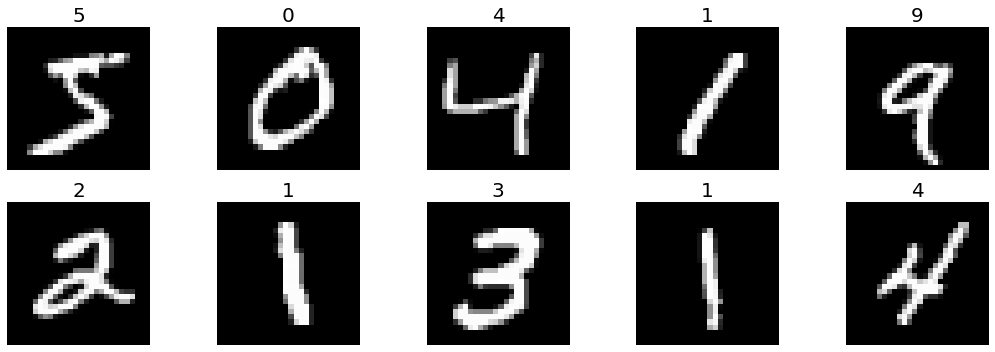

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

N = 10
for i in range(N):
    plt.subplot(2, int(N/2), i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(str(train_label[i]), fontsize=20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()    

## 네트워크(모델) 구현
- Network : 전체 모델 구조

In [7]:
model = keras.Sequential()

model.add(keras.layers.InputLayer((28,28))) 

model.add(keras.layers.Flatten())  

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

Metal device set to: Apple M1


2022-07-11 15:50:59.500422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-11 15:50:59.500767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## 컴파일 단계
- 정의된 네트워크 모델에 학습을 위한 추가 설정을 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

In [11]:
print(np.min(train_image), np.max(train_image), train_image.dtype, sep=', ')

0, 255, uint8


##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [12]:
X_train = train_image.astype(np.float32)
X_train /= 255.0

X_test = test_image.astype(np.float32)
X_test /= 255.0

In [13]:
print(np.min(X_train), np.max(X_test), X_train.dtype, sep=', ')

0.0, 1.0, float32


##### label(y)를 one hot encoding

In [14]:
print(train_label.shape, test_label.shape)
train_label[:5]

(60000,) (10000,)


array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [16]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 History 객체로 반환한다.
- History : train 시 에폭별 평가지표값들을 모아서 제공.    

In [19]:
hist = model.fit(X_train, y_train, 
                  epochs=10,  
                  batch_size=100,
                  validation_split=0.3
                 )


Epoch 1/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.1186 - val_accuracy: 0.9734
Epoch 2/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.1212 - val_accuracy: 0.9733
Epoch 3/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.1349 - val_accuracy: 0.9721
Epoch 4/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.1291 - val_accuracy: 0.9751
Epoch 5/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.1169 - val_accuracy: 0.9763
Epoch 6/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.1165 - val_accuracy: 0.9764
Epoch 7/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.1365 - val_accuracy: 0.9744
Epoch 

##### History 시각화

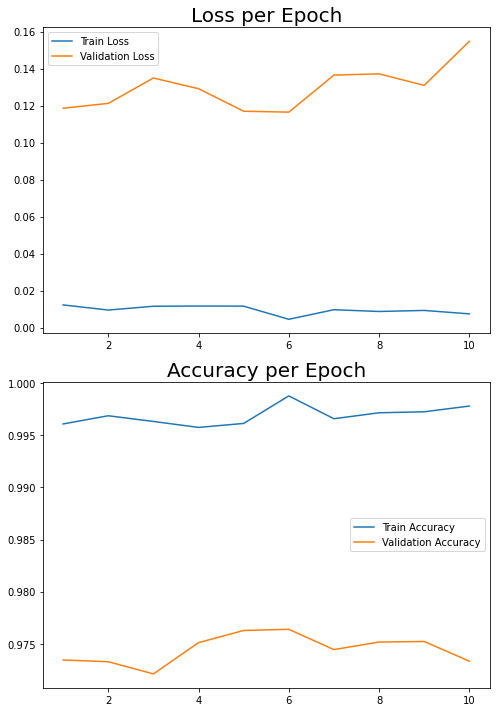

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,11), hist.history['loss'], label='Train Loss')
plt.plot(range(1,11), hist.history['val_loss'], label="Validation Loss")
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,11), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,11), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()


## 테스트셋 평가

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)

  9/313 [..............................] - ETA: 1s - loss: 0.0223 - accuracy: 0.9965  

2022-07-11 16:28:33.170876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.1211 - accuracy: 0.9765


In [22]:
print(test_loss, test_acc)

0.1210903525352478 0.9765000343322754


## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기    
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [ ]:
new_image = X_test[:5]
new_image.shape

In [ ]:
result = model.predict(new_image)
result.shape

In [ ]:
result[0]

In [ ]:
result_label = np.argmax(result, axis=-1)

In [ ]:
result_label